In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

In [140]:
### 1 GENERATE DATA
iris = None
iris = datasets.load_iris()
### Pay attention that "X" is a (150, 4) shape matrix
### y is a (150,) shape array
X = iris.data
y = iris.target

In [182]:
def center_values(matrix, columns):
    centered = np.copy(matrix)
    means = [0] * columns
    for row in centered:
        for i in range(columns):
            means[i] += row[i]
    means = [x / len(centered) for x in means]
    for i in range(len(centered)):
        for j in range(len(matrix[i])):
            centered[i][j] -= means[j]
    
    return centered, means

def covariance_matrix(A, B):
    m1 = len(A)
    m2 = len(B)
    n1 = len(A[0])
    n2 = len(B[0])
    if n1 != m2:
        raise Exception("Incorrect dimensions n1[{}] != m2[{}]".format(n1, m2))
    COV = np.zeros((m1, n2))
    for i in range(m1):
        for j in range(n2):
            for k in range(m2):
                COV[i, j] += A[i, k] * B[k, j]
    COV /= n1
    return COV

def visualize(x, y, title=''):
    plt.title(title)
    plt.plot(x[y == 0, 0], -x[y == 0, 1], 'bo', label='Setosa')
    plt.plot(x[y == 1, 0], -x[y == 1, 1], 'go', label='Versicolour')
    plt.plot(x[y == 2, 0], -x[y == 2, 1], 'ro', label='Virginica')
    plt.legend(loc=0)
    plt.show()

In [183]:
### 2 CENTER DATA
X_centered, X_means = center_values(X, columns=4) 
X_centered = X_centered.T

(150, 4)


[4.19667516 0.24062861 0.07800042 0.02352514]
this is our 2D subspace:
 [[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]


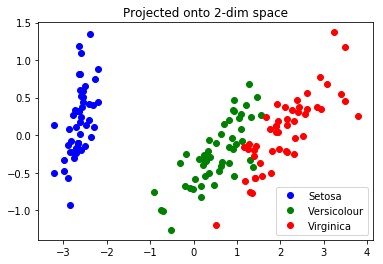

In [184]:
### 3 PROJECT DATA
### at first you need to get covariance matrix
### Pay attention that cov_mat should be a (4, 4) shape matrix
cov_mat = covariance_matrix(X_centered, X_centered.T)
# cov_mat = np.cov(X_centered)
### next step you need to find eigenvalues and eigenvectors of covariance matrix
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print(eig_values)
### find out which eigenvectors you should choose based on eigenvalues
index_1 = 0
index_2 = 1
print(f"this is our 2D subspace:\n {eig_vectors[:, [index_1,index_2]]}")
### now we can project our data to this 2D subspace
### project original data on chosen eigenvectors
selected_vectors = eig_vectors[:,[index_1, index_2]]
projected_data = np.dot(X_centered.T, selected_vectors)
### now you are able to visualize projected data
### you should get excactly the same picture as in the last lab slide
visualize(projected_data, y, title='Projected onto 2-dim space')

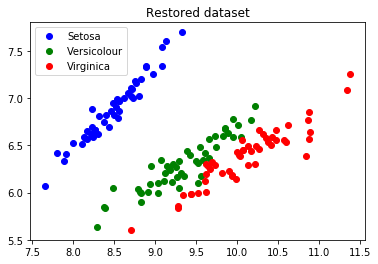

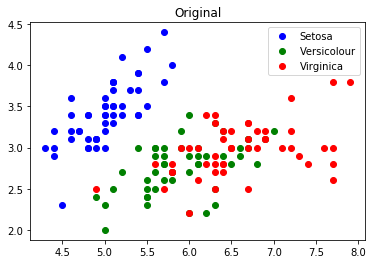

In [181]:

### 4 RESTORE DATA
### we have a "projected_data" which shape is (2,150)
### and we have a 2D subspace "eig_vectors[:, [index_1, index_2]]" which shape is (4,2)
### how to recieve a restored data with shape (4,150)?
for i in range(len(restored_data[0])):
    restored_data[:, i] += X_means[i]

visualize(restored_data, y, title='Restored dataset')
visualize(X, y, title='Original')
### I suppose the difference is because of accuracy of float numbers, in the dataset it is 1 digit after comma.

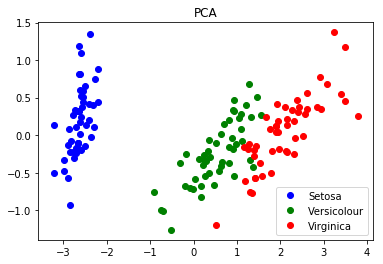

In [187]:

############################################
### CONGRATS YOU ARE DONE WITH THE FIRST PART ###
############################################

### 1 GENERATE DATA
### already is done

### 2 CENTER DATA
### already is done

### 3 PROJECT DATA
### "n_components" show how many dimensions should we project our data on 
pca = decomposition.PCA(n_components=2)
### class method "fit" for our centered data
pca.fit(X_centered.T)
### make a projection
X_pca = pca.transform(X_centered.T)
### now we can plot our data and compare with what should we get
plt.title('PCA')
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)
plt.show()

In [129]:
test = np.array([[1, 2], [3, 4], [5, 6]])
print(test)
print("Get column : {}".format(test[:,[0,1]]))
print("Get row : {}".format(test[1,:]))



[[1 2]
 [3 4]
 [5 6]]
Test A : [[1 2]
 [3 4]
 [5 6]]
Test B : [3 4]
